<a href="https://colab.research.google.com/github/xRomory/CCMACLRL_COM231ML_PROJECT/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection using Naive Bayes and Logistic Regresssion

Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets

In [2]:
fake_url = "https://github.com/xRomory/CCMACLRL_COM231ML_PROJECT/blob/main/fake_news/datasets/fake_compressed.csv?raw=true"
fake_data = pd.read_csv(fake_url)

fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true_url = "https://github.com/xRomory/CCMACLRL_COM231ML_PROJECT/blob/main/fake_news/datasets/true_compressed.csv?raw=true"
true_data = pd.read_csv(true_url)

true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# Combine Both .csv file and add a label to classify real news and fake news dataset

fake_data["Label"], true_data["Label"] = "F", "R"

data = pd.concat([fake_data, true_data], axis=0)
data.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",F
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",F
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",F
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",F
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",F


### Find out what's in the data

In [5]:
data.shape

(44898, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [7]:
data.describe(include="object").T

,count,unique,top,freq
title,44898,38729,Factbox: Trump fills top jobs for his administ...,14
text,44898,38646,,627
subject,44898,8,politicsNews,11272
date,44898,2397,"December 20, 2017",182
Label,44898,2,F,23481


As we can see, there are no missing values. But we can still verify it.

In [8]:
data.isna().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [9]:
#Check for duplicate values
data.duplicated().sum()

np.int64(209)

In [10]:
#See all instances of duplicated rows
data[data.duplicated(keep=False)]

,title,text,subject,date,Label
9941,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",F
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",F
11445,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",F
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",F
14924,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",F
...,...,...,...,...,...
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",R
21345,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",R
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",R
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",R


In [11]:
# Get value counts of Label
data.Label.value_counts()

Label
F    23481
R    21417
Name: count, dtype: int64

### Data Visualization

See the ratio of news subjects inside the datasets

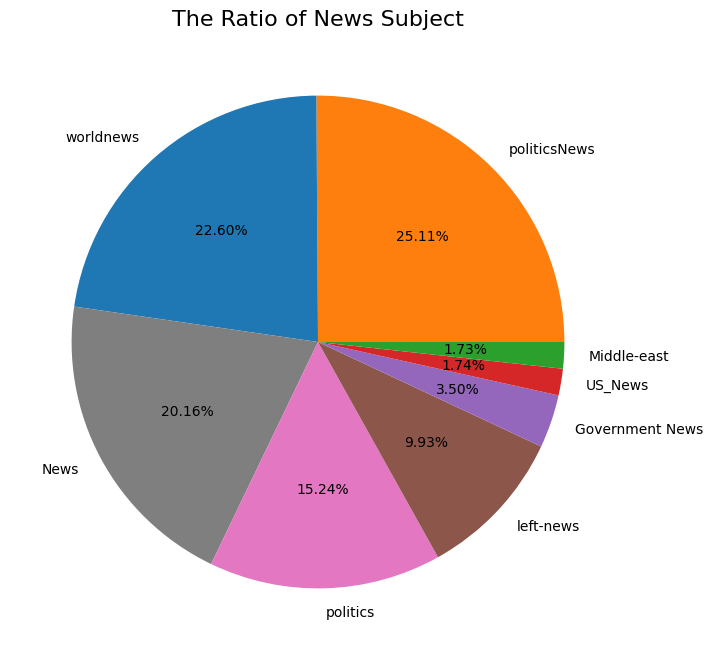

In [12]:
# Color of Pie chart
color_map = {
    "worldnews": "#1f77b4",
    "politicsNews": "#ff7f0e",
    "Middle-east": "#2ca02c",
    "US_News": "#d62728",
    "Government News": "#9467bd",
    "left-news": "#8c564b",
    "politics": "#e377c2",
    "News": "#7f7f7f"
}

subject_count = data["subject"].value_counts()
labels = subject_count.index.to_list()

colors = [color_map[label] for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(
    x=subject_count,
    autopct="%1.2f%%",
    labels=labels,
    colors=colors,
)
plt.title("The Ratio of News Subject", fontsize=16)
plt.show()

See target distribution of our data:

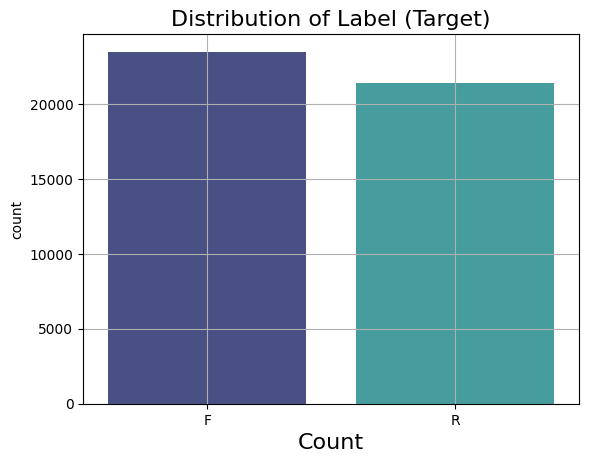

In [13]:
sns.countplot(x=data.Label, data=data, palette="mako", hue="Label")
plt.title("Distribution of Label (Target)", fontsize=16)
plt.xlabel("Target", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.grid(True)
plt.show()